In [1]:
%pylab inline
from pathlib import Path
import sys
path_to_script =  Path("~/projects/scaffan/").expanduser()
sys.path.insert(0,str(path_to_script))
import scaffan
import io3d # just to get data
import scaffan.image as scim

Populating the interactive namespace from numpy and matplotlib
add path C:\Users\Jirik\Downloads\openslide-win64-20171122\bin


# Get the data

In [2]:
# io3d.datasets.download("SCP003", dry_run=True)
fn = io3d.datasets.join_path("medical", "orig", "sample_data", "SCP003", "SCP003.ndpi", get_root=True)
print(f"filename: {fn}")

2020-03-24 10:54:10.481 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-03-24 10:54:10.567 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_.
2020-03-24 10:54:10.569 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical
2020-03-24 10:54:10.575 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig
2020-03-24 10:54:10.581 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data
2020-03-24 10:54:10.584 | DEBUG    | io3d.datasets:dataset_path:393 - checking for key local_dataset_specific_dir_medical/orig/sample_data/SCP003
2020-03-24 10:54:10.587 | DEBUG    | io3d.datasets:join_path:303 - sample_data_pathC:\Users\Jirik\data
2020-03-24 10:54:10.589 | DEBUG    | io3d.datasets:join_path:304 - path C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi


filename: C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi


# Read annotated image

In [3]:
# fn = io3d.datasets.join_path("medical", "orig", "CMU-1.ndpi", get_root=True)
anim = scim.AnnotatedImage(fn)

2020-03-24 10:54:10.599 | DEBUG    | scaffan.image:__init__:203 - fs_enc: utf-8
2020-03-24 10:54:10.600 | DEBUG    | scaffan.image:__init__:204 - Reading file C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi
2020-03-24 10:54:10.623 | DEBUG    | scaffan.image:read_annotations:308 - Reading the annotation C:\Users\Jirik\data\medical\orig\sample_data\SCP003\SCP003.ndpi
2020-03-24 10:54:12.688 | DEBUG    | scaffan.annotation:read_annotations:122 - windows annotation output:b'\x1b2020-03-24 10:54:12.473\x1b | \x1b\x1bDEBUG   \x1b | \x1bscaffan.annotation\x1b:\x1bndpa_to_json\x1b:\x1b72\x1b - \x1b\x1bPATH: ...\\bin;C:\\Users\\Jirik\\Downloads\\openslide-win64-20171122\\bin;C...\x1b\r\n'


# Views

The View is extracted from an annotated image by center or location (upper left corner). Additional information is size of
view in pixels or in mm. A [openslide](https://openslide.org/api/python/) package is called in background.

## Get grayscale image by center

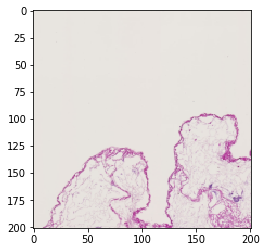

In [4]:
pixelsize_mm = [0.005, 0.005]

view = anim.get_view(center=(16000,10000), size_mm=[1, 1], pixelsize_mm=pixelsize_mm)
img = view.get_region_image(as_gray=False)
plt.imshow(img)
# view = anim.get_views(ann_ids, pixelsize_mm=pixelsize_mm)[0]



## Get grayscale image by annotation color

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 28, 33]


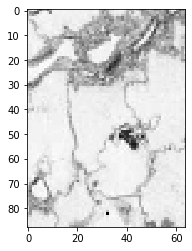

In [5]:
ann_ids = anim.select_annotations_by_color("#000000")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[0]
img = view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

## Change one view into other view

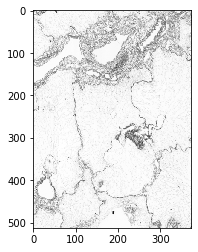

In [6]:
detail_view = view.to_pixelsize(pixelsize_mm=[0.005, 0.005])
img = detail_view.get_region_image(as_gray=True)
plt.imshow(img, cmap='gray')

# Annotations

In [27]:
ann_ids = anim.select_annotations_by_color("#000000")
# ann_ids = anim.select_annotations_by_title("cyan1")
print(ann_ids)
view = anim.get_views(ann_ids, level=7)[12]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 25, 26, 28, 33]


## Show annotation

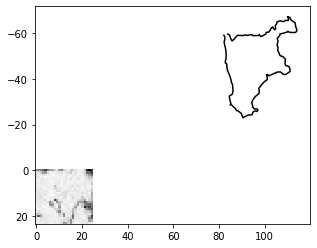

In [26]:

img = view.get_region_image(as_gray=True)

plt.imshow(img, cmap='gray')
view.plot_annotations(ann_ids[0])


## Get annotation raster

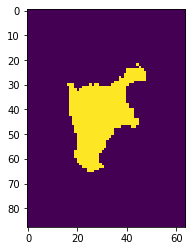

In [11]:
img_ann = view.get_annotation_region_raster(ann_ids[0])
plt.imshow(img_ann)

In [28]:
for ann in anim.annotations:
    print(ann["title"])






AN1














septum
septum
septum
septum



empty

empty




small
test1
test2


In [30]:

for ann in anim.annotations:
    print(ann["details"])

PFCVI=2 SNI=1 SWP=1 CMP=0.5 SQZ=0.5
SNI=1.0 CMP=0.7
PFCVI=2 SNI=1.5 SWP=1  SQZ=0.3 IFE=0 CVM=0
PFCVI=2 SNI=1 SWP=1 CMP=0.6
SNI=1.0 CMP=0.7
PFCVI=2 SNI=2 SWP=1  CMP=0.8
SNI=1.5 CMP=0.6
PFCVI=2 SNI=1.5 SWP=1  SQZ=0.3
PFCVI=2 SNI=1 SWP=1  SQZ=0.4 IFE=0.5
SNI=0.5 SQZ=0.5 IFE=0 CVM=0
























IFE=0.3 CVM=0 SNI=1.8


